In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

from ggplot import *

C:\Users\enterprise\Anaconda2\envs\py35\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\enterprise\Anaconda2\envs\py35\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
data = pd.read_csv('C:/Users/enterprise/Google Drive/fake_news_resources/raw_data/100_w2v.csv')

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,0.358006,0.049328,-0.544657,0.094677,0.050939,0.035657,0.321715,0.478800,0.558396,0.290516,...,0.111948,-0.069135,-0.019033,0.443918,0.192580,-0.033819,-0.421380,0.244594,0.052310,0
1,0.397394,0.262826,-0.107323,0.080161,0.192067,-0.006315,0.058777,0.209046,0.373120,-0.316050,...,0.479176,0.127286,-0.310411,-0.033167,0.414959,0.311371,-0.041179,0.328140,0.389481,0
2,0.443869,-0.260809,-0.459488,0.020630,-0.155390,-0.046496,0.430752,0.571298,0.384597,0.404605,...,0.223908,-0.137682,0.001700,0.444013,-0.118552,0.098416,-0.577361,0.177187,0.148094,0
3,0.346452,0.078735,-0.563065,0.152900,-0.058748,0.105393,0.242387,0.409437,0.472619,0.335524,...,0.099060,-0.099508,0.042193,0.526461,0.059419,0.018799,-0.466556,0.257738,-0.045828,0
4,0.443232,0.193688,-0.326663,0.090894,0.174560,0.050021,0.140027,0.176987,0.453742,-0.176404,...,0.261442,0.172954,-0.162313,0.119871,0.475475,0.144467,-0.073184,0.363310,0.290809,0


In [4]:
X = data.drop(['class'], 1)
y = data[['class']]

In [5]:
X_array = X.values
y_array = y.values

In [6]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)

In [7]:
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1488 samples in 0.000s...
[t-SNE] Computed neighbors for 1488 samples in 0.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1488
[t-SNE] Computed conditional probabilities for sample 1488 / 1488
[t-SNE] Mean sigma: 0.465231
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.733116
[t-SNE] KL divergence after 500 iterations: 1.358747


In [8]:
df_tsne = data.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

In [9]:
df_tsne.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,class,x-tsne,y-tsne
0,0.358006,0.049328,-0.544657,0.094677,0.050939,0.035657,0.321715,0.478800,0.558396,0.290516,...,-0.019033,0.443918,0.192580,-0.033819,-0.421380,0.244594,0.052310,0,-13.481290,4.832021
1,0.397394,0.262826,-0.107323,0.080161,0.192067,-0.006315,0.058777,0.209046,0.373120,-0.316050,...,-0.310411,-0.033167,0.414959,0.311371,-0.041179,0.328140,0.389481,0,-36.459652,-9.192479
2,0.443869,-0.260809,-0.459488,0.020630,-0.155390,-0.046496,0.430752,0.571298,0.384597,0.404605,...,0.001700,0.444013,-0.118552,0.098416,-0.577361,0.177187,0.148094,0,-10.370177,10.360218
3,0.346452,0.078735,-0.563065,0.152900,-0.058748,0.105393,0.242387,0.409437,0.472619,0.335524,...,0.042193,0.526461,0.059419,0.018799,-0.466556,0.257738,-0.045828,0,-13.488594,4.722853
4,0.443232,0.193688,-0.326663,0.090894,0.174560,0.050021,0.140027,0.176987,0.453742,-0.176404,...,-0.162313,0.119871,0.475475,0.144467,-0.073184,0.363310,0.290809,0,-35.355740,-10.372531


In [10]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='class') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")

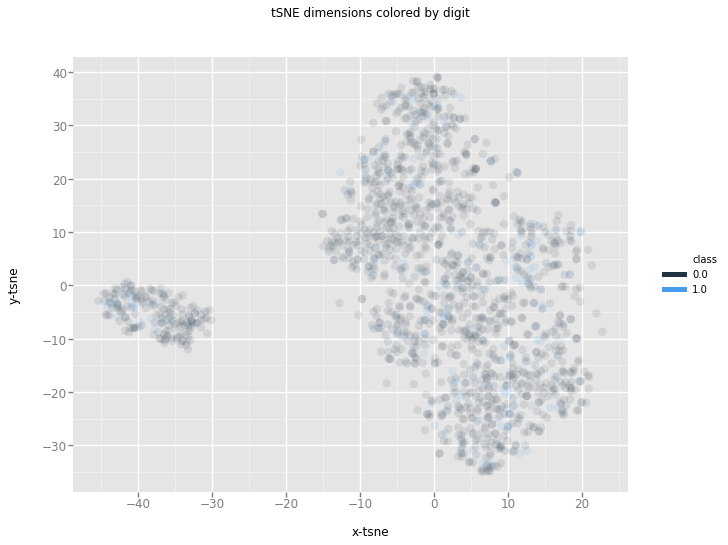

<ggplot: (37160586956)>

In [11]:
chart

In [12]:
from matplotlib import pyplot as plt

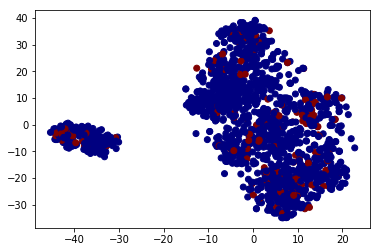

In [13]:
plt.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], c=df_tsne['class'], cmap=plt.cm.get_cmap("jet", 10))
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
plt.show()